## Section E. Multiclass Perceptron

### Implement the multiclass perceptron 

In [7]:
# libraries
library(ggplot2)

In [64]:
# read data
train_1d <- read.csv('./Task1D_train.csv')
test_1d <- read.csv('./Task1D_test.csv')

In [65]:
# subset data into x and labels
train.data <- train_1d[,-5]
train.label <- train_1d[,5]
test.data <- test_1d[,-5]
test.label <- test_1d[,5]
train.len  <- nrow(train.data)

In [66]:
## Basis function (Step 1)
Phi <- as.matrix(cbind(1, train.data)) # add a column of 1 as phi_0

# Initialization
eta <- 0.01 # Learning rate
epsilon <- 0.001 # Stoping criterion
tau.max <- 300 # Maximum number of iterations

T <- train.label # Convention for class labels

# create weight vector for each label C1, C2 ,C3
set.seed(1332)
W1 <- matrix(,nrow=tau.max, ncol=ncol(Phi)) # E mpty Weight vector
W2 <- matrix(,nrow=tau.max, ncol=ncol(Phi))
W3 <- matrix(,nrow=tau.max, ncol=ncol(Phi))
W1[1,] <- runif(ncol(Phi)) # Random initial values for weight vector
W2[1,] <- runif(ncol(Phi))
W3[1,] <- runif(ncol(Phi))

error.trace <- matrix(0,nrow=tau.max, ncol=1) # Placeholder for errors
# placeholder for predictions
pred_x <- data.frame("C1" = rep(0,75), "C2" = rep(0,75), "C3" = rep(0,75))
# calculate predictions with initial weights
pred_x[,1] <- Phi%*%W1[1,]
pred_x[,2] <- Phi%*%W2[1,]
pred_x[,3] <- Phi%*%W3[1,]
# intialize missclassified number
miss  <- 0
# calculate initial missclassified number at tau = 1
for (i in 1:75){
    if (rownames(data.frame(which.max(pred_x[i,]))) != T[i]){
        miss <- miss + 1
    }
}   
# store in error dataframe
error.trace[1] <- miss

tau <- 1 # iteration counter 
terminate <- FALSE # termination status

In [67]:
# train the model on training data

while(!terminate){
    # resuffling train data and associated labels:
    train.index <- sample(1:train.len, replace = FALSE)
    Phi <- Phi[train.index,]
    T <- T[train.index]

    # update weights in step function
    for (i in 1:train.len){
        # terminate at max iteration
        if (tau == tau.max) {break}

        # find argmax(Wk Xk)
        pred <- data.frame("label" = c('C1','C2','C3'), "prediction" = c(0,0,0))  # create a dataframe for prediction
        pred[1,2] <- Phi[i,]%*%W1[tau,]  # W1*x
        pred[2,2] <- Phi[i,]%*%W2[tau,]  # W2*x
        pred[3,2] <- Phi[i,]%*%W3[tau,]  # W3*x
        pred.label <- pred[which.max(pred[,2]),1]  # find the largest and its predicted class
        # if it is missclassified
        if (pred.label != T[i]){

            # update tau  counter
            tau <- tau + 1 

            # update the weights
            # increase the weights of truth label
            if (T[i] == "C1"){
                W1[tau,] <- W1[tau-1,] + eta * Phi[i,]
                # update the records
            }
            if (T[i] == "C2"){
                W2[tau,] <- W2[tau-1,] + eta * Phi[i,]
                # update the records
            }
            if (T[i] == "C3"){
                W3[tau,] <- W3[tau-1,] + eta * Phi[i,]
                # update the records
            }
            # decrease weights of predicted wrong label
            if (pred.label == "C1"){
                W1[tau,] <- W1[tau-1,] - eta * Phi[i,]
            }
            if (pred.label == "C2"){
                W2[tau,] <- W2[tau-1,] - eta * Phi[i,]
            }
            if (pred.label == "C3"){
                W3[tau,] <- W3[tau-1,] - eta * Phi[i,]
            }

            # do nothing to the other class weights
            if (pred.label == "C1" & T[i] == "C2"){
                W3[tau,] <- W3[tau-1,]
            }

            if (pred.label == "C1" & T[i] == "C3"){
                W2[tau,] <- W2[tau-1,]
            }
            if (pred.label == "C2" & T[i] == "C1"){
                W3[tau,] <- W3[tau-1,]
            }
            if (pred.label == "C2" & T[i] == "C3"){
                W1[tau,] <- W1[tau-1,]
            }
            if (pred.label == "C3" & T[i] == "C1"){
                W2[tau,] <- W2[tau-1,]
            }
            if (pred.label == "C3" & T[i] == "C2"){
                W1[tau,] <- W1[tau-1,]
            }

            # update errors
            # calcualte prediction for each class
            pred_x[,1] <- Phi%*%W1[tau,]
            pred_x[,2] <- Phi%*%W2[tau,]
            pred_x[,3] <- Phi%*%W3[tau,]
            # initialize number of missclassification
            miss  <- 0
            # calculate how many is missclassified
            for (i in 1:75){
                if (rownames(data.frame(which.max(pred_x[i,]))) != T[i]){
                    miss <- miss + 1
                }
            } 
            # record missclassification
            error.trace[tau] <- miss
        }


    }

    # decrease eta:
    eta = eta * 0.99
    # recalculate termination conditions
    terminate <- tau >= tau.max 
        
}

### Train two multiclass perceptron models with η to .1 and .01 

In [128]:
## Basis function 
Phi <- as.matrix(cbind(1, train.data)) # add a column of 1 as phi_0
test_Phi <- as.matrix(cbind(1, test.data))

# Initialization
#eta <- 0.1 # Learning rate

tau.max <- 300 # Maximum number of iterations

T <- train.label # Convention for class labels

# create weight vector for each label C1, C2 ,C3
set.seed(1332)
W1 <- matrix(,nrow=tau.max, ncol=ncol(Phi)) # E mpty Weight vector
W2 <- matrix(,nrow=tau.max, ncol=ncol(Phi))
W3 <- matrix(,nrow=tau.max, ncol=ncol(Phi))
W1[1,] <- runif(ncol(Phi)) # Random initial values for weight vector
W2[1,] <- runif(ncol(Phi))
W3[1,] <- runif(ncol(Phi))

error.trace <- matrix(NA,nrow=tau.max, ncol=1) # Placeholder for errors
# placeholder for predictions
pred_x <- data.frame("C1" = rep(0,75), "C2" = rep(0,75), "C3" = rep(0,75))
# calculate predictions with initial weights
pred_x[,1] <- test_Phi%*%W1[1,]
pred_x[,2] <- test_Phi%*%W2[1,]
pred_x[,3] <- test_Phi%*%W3[1,]
# intialize missclassified number
miss  <- 0
# calculate initial missclassified number at tau = 1
for (i in 1:75){
    if (rownames(data.frame(which.max(pred_x[i,]))) != T[i]){
        miss <- miss + 1
    }
}   
# store in error dataframe
error.trace[1] <- miss

tau <- 1 # iteration counter 
terminate <- FALSE # termination status

In [129]:
perc <- function(eta){
    while(!terminate){
        # resuffling train data and associated labels:
        train.index <- sample(1:train.len, replace = FALSE)
        Phi <- Phi[train.index,]
        T <- T[train.index]
        # use to count data points
        c  <- 0
        
        # update weights in step function
        for (i in 1:train.len){
            # count data points used
            c  <- c + 1
            # terminate at max iteration
            if (tau == tau.max) {break}

            # find argmax(Wk Xk)
            pred <- data.frame("label" = c('C1','C2','C3'), "prediction" = c(0,0,0))  # create a dataframe for prediction
            pred[1,2] <- Phi[i,]%*%W1[tau,]  # W1*x
            pred[2,2] <- Phi[i,]%*%W2[tau,]  # W2*x
            pred[3,2] <- Phi[i,]%*%W3[tau,]  # W3*x
            pred.label <- pred[which.max(pred[,2]),1]  # find the largest and its predicted class
            # if it is missclassified
            if (pred.label != T[i]){

                # update tau  counter
                tau <- tau + 1 

                # update the weights
                # increase the weights of truth label
                if (T[i] == "C1"){
                    W1[tau,] <- W1[tau-1,] + eta * Phi[i,]
                    # update the records
                }
                if (T[i] == "C2"){
                    W2[tau,] <- W2[tau-1,] + eta * Phi[i,]
                    # update the records
                }
                if (T[i] == "C3"){
                    W3[tau,] <- W3[tau-1,] + eta * Phi[i,]
                    # update the records
                }
                # decrease weights of predicted wrong label
                if (pred.label == "C1"){
                    W1[tau,] <- W1[tau-1,] - eta * Phi[i,]
                }
                if (pred.label == "C2"){
                    W2[tau,] <- W2[tau-1,] - eta * Phi[i,]
                }
                if (pred.label == "C3"){
                    W3[tau,] <- W3[tau-1,] - eta * Phi[i,]
                }

                # do nothing to the other class weights
                if (pred.label == "C1" & T[i] == "C2"){
                    W3[tau,] <- W3[tau-1,]
                }

                if (pred.label == "C1" & T[i] == "C3"){
                    W2[tau,] <- W2[tau-1,]
                }
                if (pred.label == "C2" & T[i] == "C1"){
                    W3[tau,] <- W3[tau-1,]
                }
                if (pred.label == "C2" & T[i] == "C3"){
                    W1[tau,] <- W1[tau-1,]
                }
                if (pred.label == "C3" & T[i] == "C1"){
                    W2[tau,] <- W2[tau-1,]
                }
                if (pred.label == "C3" & T[i] == "C2"){
                    W1[tau,] <- W1[tau-1,]
                }

                # update errors
                # calcualte prediction for each class
                pred_x[,1] <- Phi%*%W1[tau,]
                pred_x[,2] <- Phi%*%W2[tau,]
                pred_x[,3] <- Phi%*%W3[tau,]   
            }
            
            
            # calculate error every 5 data point
            if(c %% 5 == 0){
                # initialize number of missclassification
                miss  <- 0
                # calculate the number of missclassification in predictions using Wk Xk at this tau
                for (j in 1:75){
                    if (rownames(data.frame(which.max(pred_x[j,]))) != T[j]){
                        miss <- miss + 1
                    }
                } 
                # record missclassification
                error.trace[tau] <- miss
            }
        }

        # decrease eta:
        eta = eta * 0.99
        # recalculate termination conditions
        terminate <- tau >= tau.max 
        
    }
    return(error.trace)
}

In [130]:
# First model with eta <- 0.01
error_1 <- perc(0.01)
error_2 <- perc(0.1)

In [132]:
# remove NA in error_1 and error_2 
error_1 <- data.frame(na.omit(error_1))
error_2 <- data.frame(na.omit(error_2))


In [134]:
# add a column indicate learning rate
model_1 <- data.frame("batch" = 1:nrow(error_1),"error" = error_1, "Lr" = rep(0.01, nrow(error_1)))
model_2 <- data.frame("batch" = 1:nrow(error_2),"error" = error_2, "Lr" = rep(0.1, nrow(error_2)))

In [142]:
# merge errors of two model together by learning rate
colnames(model_1)[2] <- "error"
colnames(model_2)[2] <- "error"
error_comp <- rbind(model_1,model_2)
error_comp$Lr <- as.factor(error_comp$Lr)

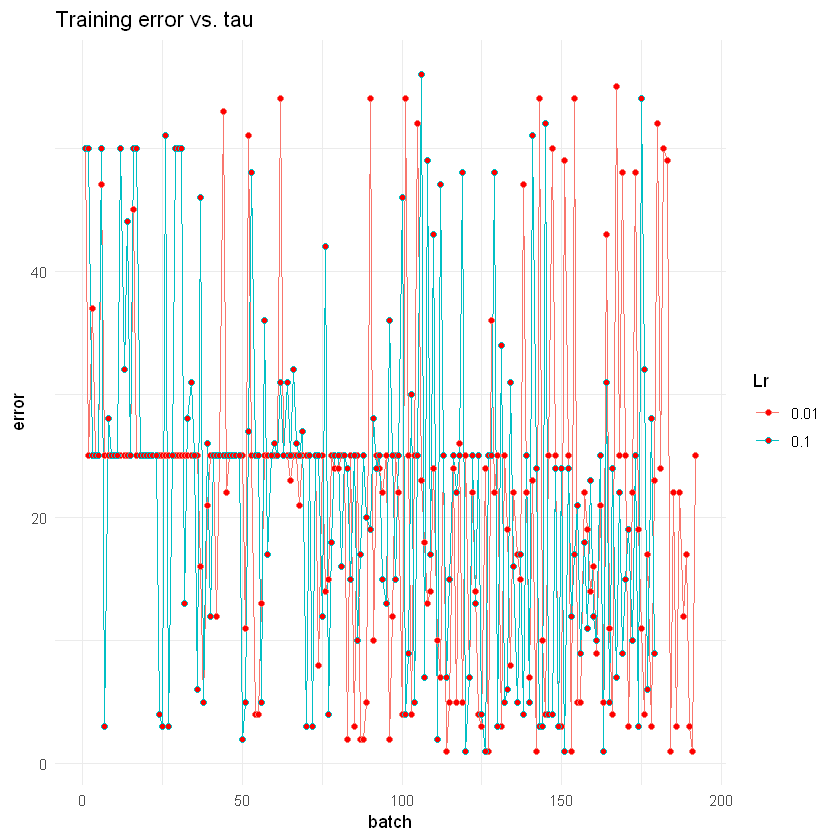

In [143]:
# plot error vs batch for the two learning rate
ggplot(data=error_comp,aes(x=batch, y=error, color = Lr)) + geom_line() + geom_point(shape=21, fill='red')  +
    ggtitle('Training error vs. tau') + theme_minimal()

The plot does not show well, this may due to some errors in the preceptron function. In expectation, the model with a smaller learning rate will have a smoother curve of decreasing in testing error as number of batches increase. Model with large learning rate, in this case a learning rate of 0.1 causes the testing error to fluctuate up and down. This is due to the fact that a larger learning rate leads to larger steps in graident decent, where a large step may be benefitial at the start but also make it much harder to coverage. On the other hand, the testing errors of the model with a learning rate of 0.01 does not decrease as much as 0.1 at beginning. As number of batches increase, the testing errors become closer to coverage, although the steps are small compare to lr = 0.1, it is more likely to coverage in a steady pace.